In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load data from both sheets
df_employee = pd.read_excel('Data.xlsx', sheet_name='Employee')
df_performance = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge the two dataframes on EmployeeID
df = pd.merge(df_employee, df_performance, on='EmployeeID', how='inner')

print(df.head())

  EmployeeID FirstName LastName  Gender  Age BusinessTravel Department  \
0  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
1  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
2  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
3  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
4  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   

   DistanceFromHome State Ethnicity  ...  ReviewDate EnvironmentSatisfaction  \
0                27    IL     White  ...  10/30/2016                       3   
1                27    IL     White  ...  10/30/2017                       4   
2                27    IL     White  ...  10/30/2018                       5   
3                27    IL     White  ...  10/30/2019                       1   
4                27    IL     White  ...  10/31/2014                       3   

  JobSatisfaction RelationshipSatisfaction  TrainingOpportunitiesWithinYea

---
#### 1. What is the gender and ethnic composition of the workforce?
>

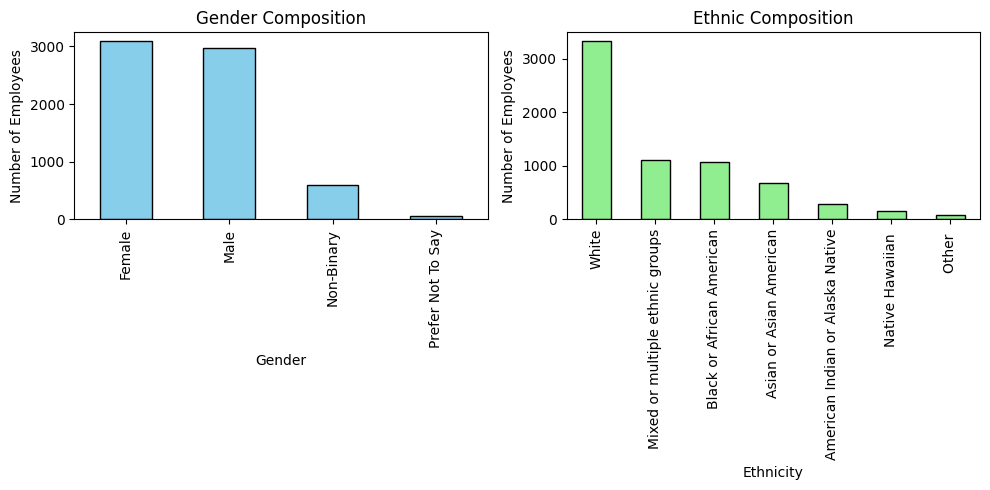

In [12]:
# Analyze gender and ethnic composition
def workforce_demographics(data):
    
    gender_counts = data['Gender'].value_counts()
    ethnicity_counts = data['Ethnicity'].value_counts()

    # Plot gender composition
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Gender Composition')
    plt.ylabel('Number of Employees')
    plt.xlabel('Gender')

    # Plot ethnicity composition
    plt.subplot(1, 2, 2)
    ethnicity_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Ethnic Composition')
    plt.ylabel('Number of Employees')
    plt.xlabel('Ethnicity')

    plt.tight_layout()
    plt.savefig('workforce_demographics.png')  # Save the plot
    plt.show()

# Call the function
workforce_demographics(df)


---
#### 2 .How does age distribution vary across departments ? 
>

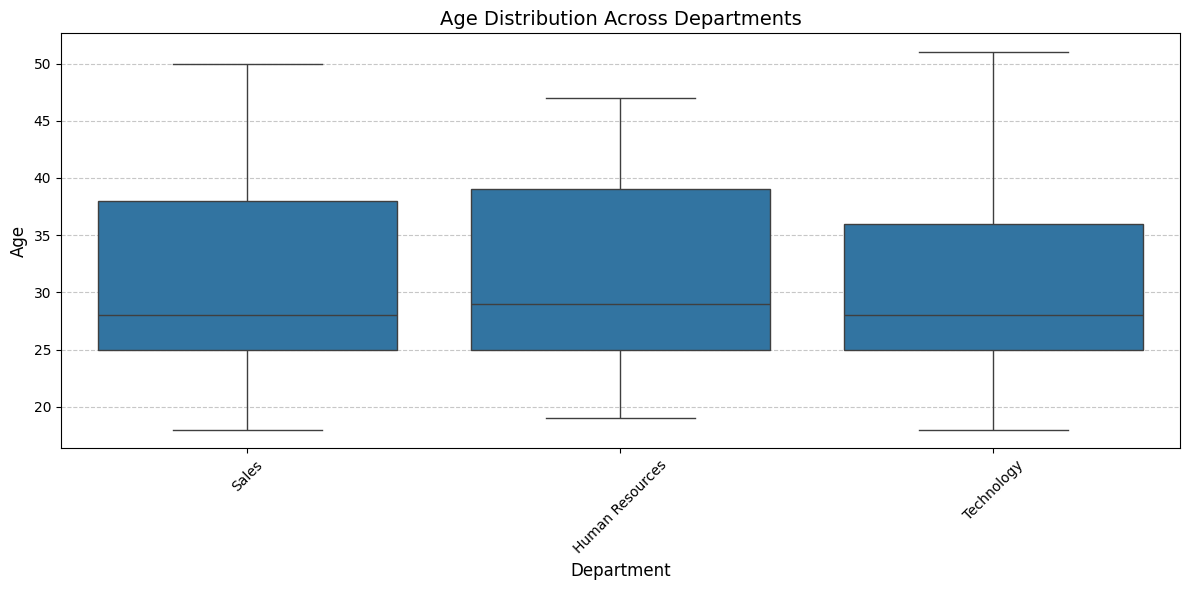

In [13]:
# Ensure the required columns exist
if 'Age' in df.columns and 'Department' in df.columns:
    # Plot the age distribution across departments
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Department', y='Age')
    plt.title('Age Distribution Across Departments', fontsize=14)
    plt.xlabel('Department', fontsize=12)
    plt.ylabel('Age', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Make sure the columns 'Age' and 'Department' exist in the dataset.")


---
#### 3 .What are the key factors driving employee attrition? 
#### 4 .How does attrition vary across demographics (e.g., gender, ethnicity) and departments ? 
>

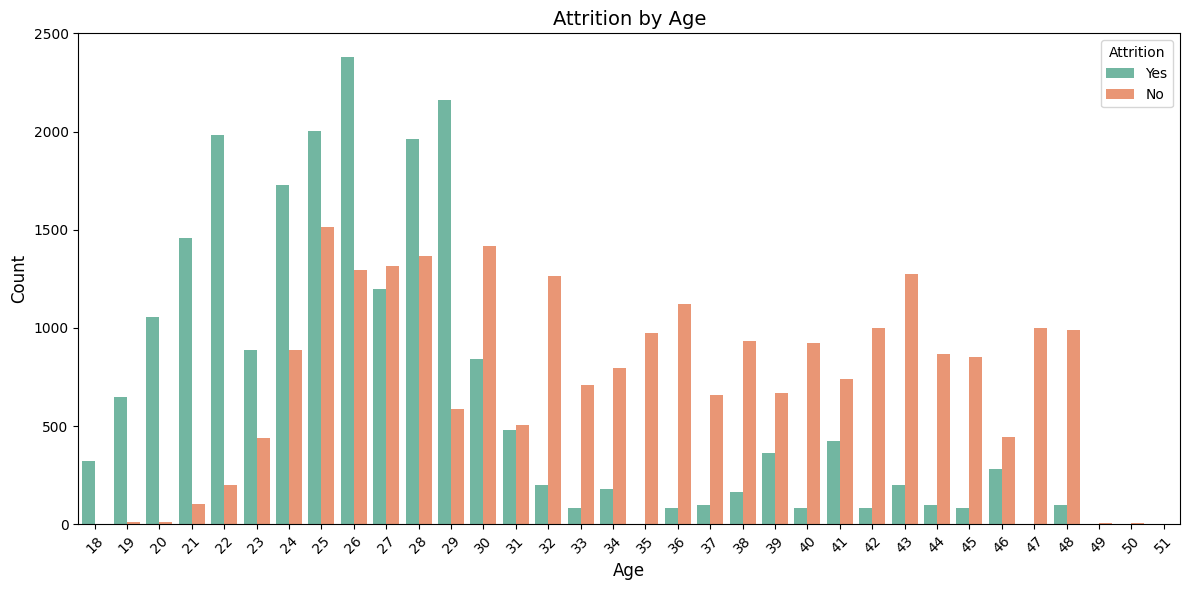

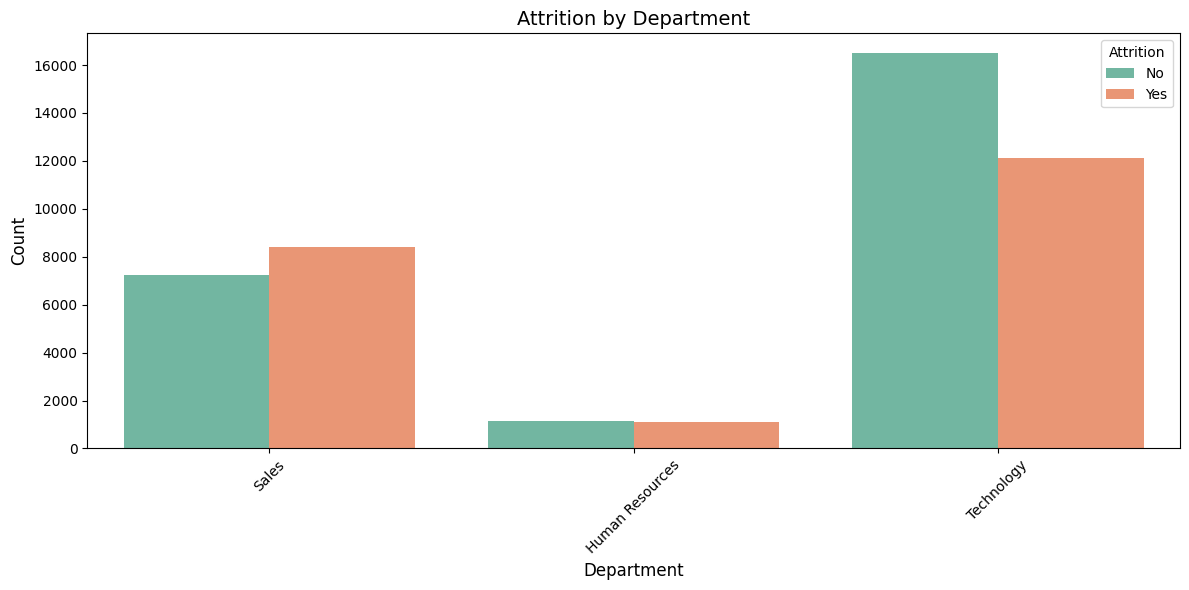

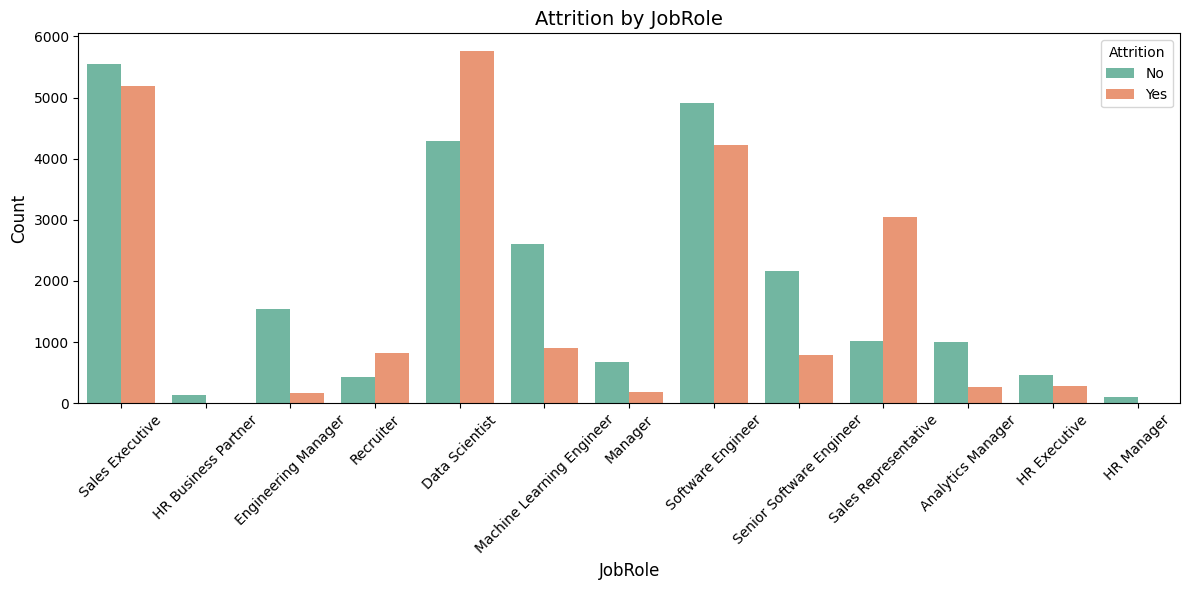

Column 'JobSatisfaction' not found in the dataset.


In [18]:
# Merge performance data to get JobSatisfaction
if 'EmployeeID' in df.columns and 'EmployeeID' in df.columns:
    df = df.merge(df[['EmployeeID', 'JobSatisfaction']], on='EmployeeID', how='left')
else:
    print("EmployeeID column not found in one of the datasets.")

# Rename MonthlyIncome to salary
if 'MonthlyIncome' in df.columns:
    df.rename(columns={'MonthlyIncome': 'Salary'}, inplace=True)
    
    # Drop rows where salary is missing
    df = df.dropna(subset=['Salary'])
    
    # Categorize salary into bins
    bins = [0, 3000, 7000, 12000, 20000, df['Salary'].max()]
    labels = ['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
    df['salary_category'] = pd.cut(df['Salary'], bins=bins, labels=labels)

# Check for the 'Attrition' column
if 'Attrition' in df.columns:
    # Ensure salary_category exists before analysis
    if 'salary_category' in df.columns:
        key_factors = ['Age', 'Department', 'JobRole', 'Salary', 'JobSatisfaction']  
    else:
        key_factors = ['Age', 'Department', 'JobRole', 'JobSatisfaction']  

    for factor in key_factors:
        if factor in df.columns:
            plt.figure(figsize=(12, 6))
            sns.countplot(data=df, x=factor, hue='Attrition', palette='Set2')
            plt.title(f'Attrition by {factor}', fontsize=14)
            plt.xlabel(factor, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title='Attrition', loc='upper right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{factor}' not found in the dataset.")
else:
    print("The dataset does not contain an 'Attrition' column.")




---
#### 6 .Is there a significant deference in salaries across departments, genders, or other demographic groups ?
>

In [10]:
print(df['Salary'].describe())


count      6899.000000
mean     110898.374112
std       98427.862382
min       20387.000000
25%       44646.000000
50%       74458.000000
75%      137219.500000
max      547204.000000
Name: Salary, dtype: float64


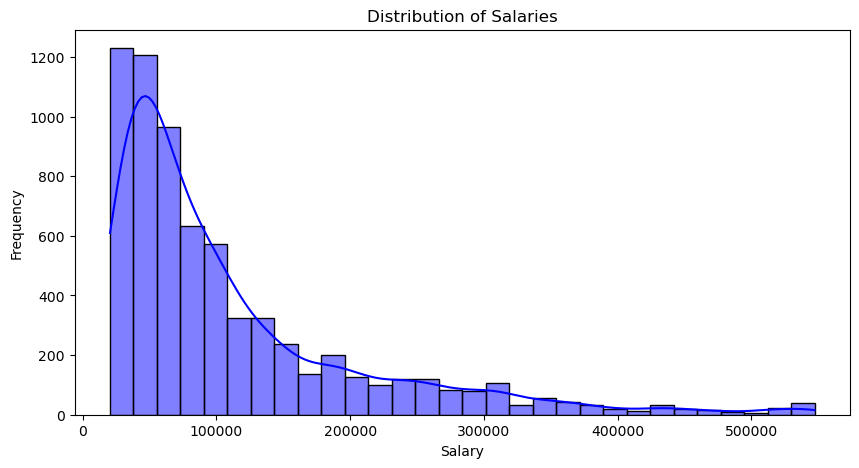

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Salary'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [14]:
avg_salary_by_department = df.groupby('Department')['Salary'].mean().sort_values()
print(avg_salary_by_department)

Department
Technology         106245.325486
Human Resources    107629.555911
Sales              120568.309815
Name: Salary, dtype: float64


/tmp/ipykernel_14442/1471481522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Salary', palette='Set2')


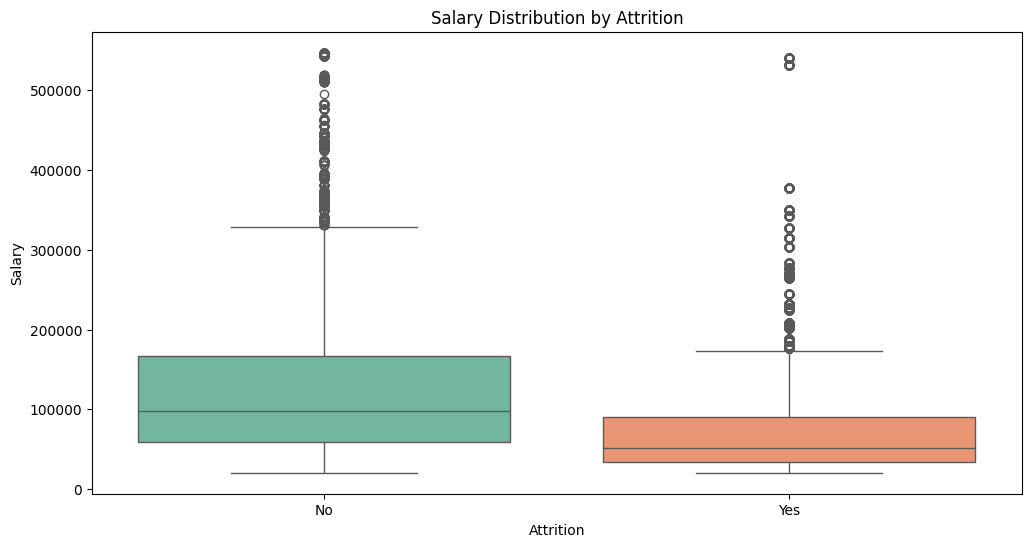

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Attrition', y='Salary', palette='Set2')
plt.title('Salary Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Salary')
plt.show()


In [25]:
# التحقق من أن الأعمدة المطلوبة موجودة
if 'Department' in df.columns and 'Salary' in df.columns:
    # إنشاء قائمة من الرواتب لكل قسم
    department_groups = [group["Salary"].dropna() for _, group in df.groupby("Department")]

    # تنفيذ اختبار ANOVA
    f_stat, p_value = stats.f_oneway(*department_groups)
    print(f"ANOVA Test for Salary across Departments:\nF-statistic: {f_stat}, P-value: {p_value}")

    # تفسير النتيجة
    if p_value < 0.05:
        print("There is a significant difference in salaries across departments.")
    else:
        print("There is no significant difference in salaries across departments.")
else:
    print("Columns 'Department' or 'salary' not found in dataset.")



ANOVA Test for Salary across Departments:
F-statistic: 16.396545964880282, P-value: 7.878165189205841e-08
There is a significant difference in salaries across departments.


/tmp/ipykernel_14442/2382475819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Salary', palette='Set2')


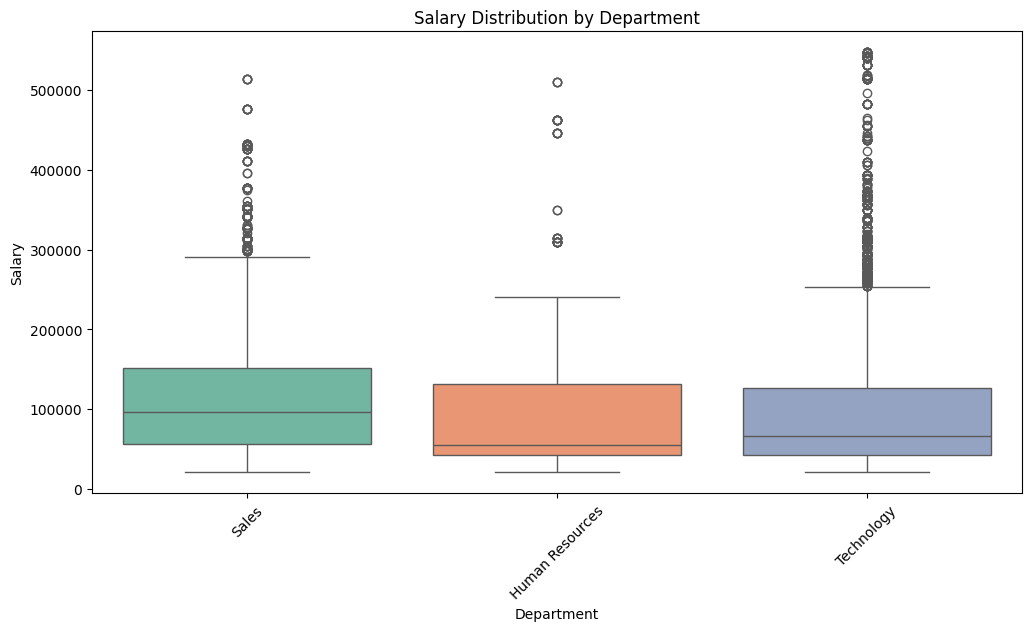

/tmp/ipykernel_14442/2382475819.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Department', y='Salary', palette='Set3', ci=None)
/tmp/ipykernel_14442/2382475819.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Department', y='Salary', palette='Set3', ci=None)


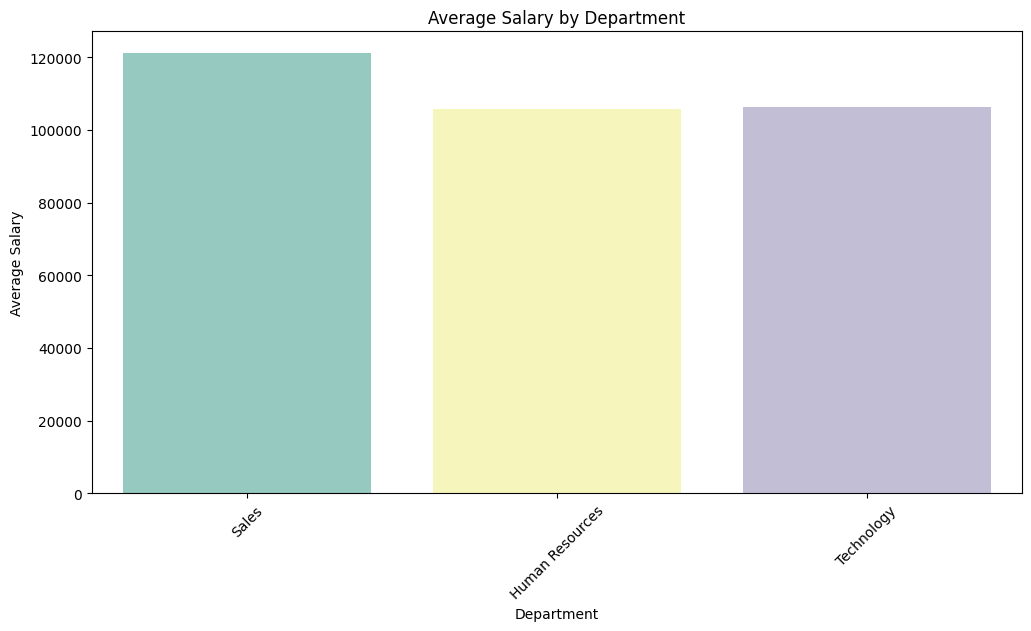

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='Salary', palette='Set2')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Department', y='Salary', palette='Set3', ci=None)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


In [27]:
if 'Education' in df.columns and 'Salary' in df.columns:
    education_groups = [group["Salary"].dropna() for _, group in df.groupby("Education")]

    f_stat, p_value = stats.f_oneway(*education_groups)
    print(f"ANOVA Test for Salary across Education Levels:\nF-statistic: {f_stat}, P-value: {p_value}")

    if p_value < 0.05:
        print("There is a significant difference in salaries across education levels.")
    else:
        print("There is no significant difference in salaries across education levels.")

ANOVA Test for Salary across Education Levels:
F-statistic: 25.645059239336614, P-value: 4.033076526622965e-21
There is a significant difference in salaries across education levels.


/tmp/ipykernel_14442/2137049170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education', y='Salary', palette='magma')


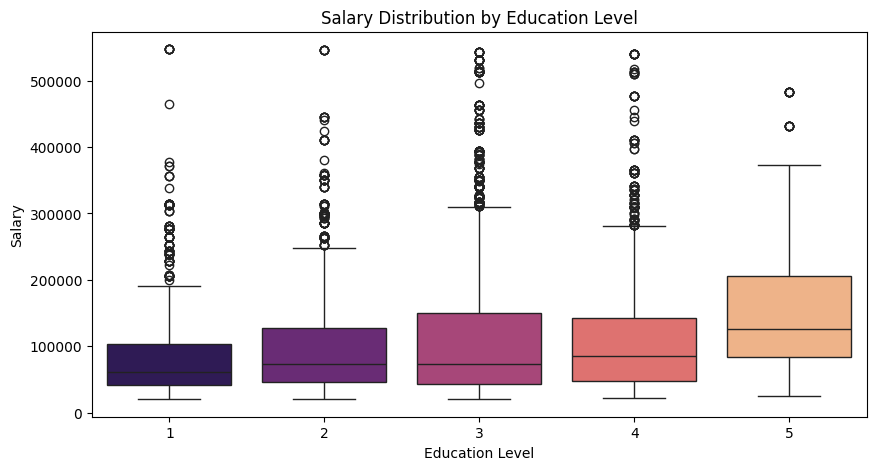

/tmp/ipykernel_14442/2137049170.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Education', y='Salary', palette='cividis', ci=None)
/tmp/ipykernel_14442/2137049170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Education', y='Salary', palette='cividis', ci=None)


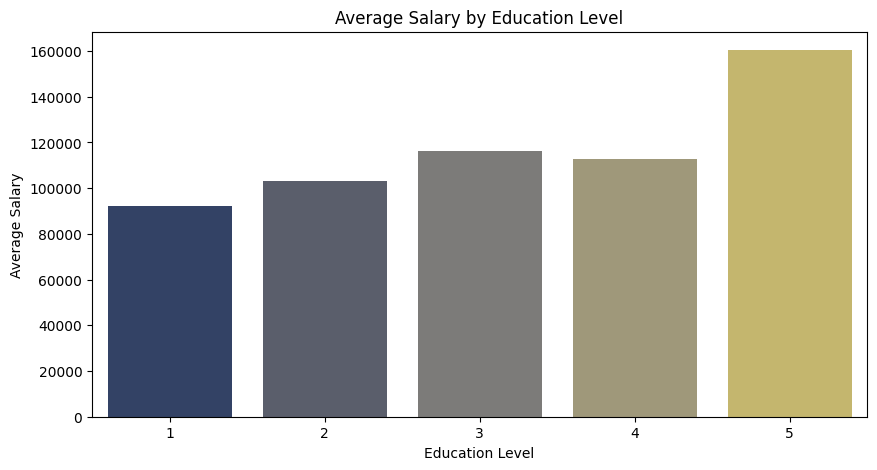

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Education', y='Salary', palette='magma')
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Education', y='Salary', palette='cividis', ci=None)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()


In [29]:
# التحقق من وجود الأعمدة
if 'Gender' in df.columns and 'Salary' in df.columns:
    male_salaries = df[df['Gender'] == 'Male']['Salary'].dropna()
    female_salaries = df[df['Gender'] == 'Female']['Salary'].dropna()

    # تنفيذ اختبار T-test
    t_stat, p_value = stats.ttest_ind(male_salaries, female_salaries, equal_var=False)
    print(f"T-test for Salary by Gender:\nT-statistic: {t_stat}, P-value: {p_value}")

    if p_value < 0.05:
        print("There is a significant difference in salaries between genders.")
    else:
        print("There is no significant difference in salaries between genders.")
else:
    print("Columns 'Gender' or 'salary' not found in dataset.")


T-test for Salary by Gender:
T-statistic: 1.6074820113107549, P-value: 0.1080009797602959
There is no significant difference in salaries between genders.


/tmp/ipykernel_14442/4234611304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Salary', palette='coolwarm')


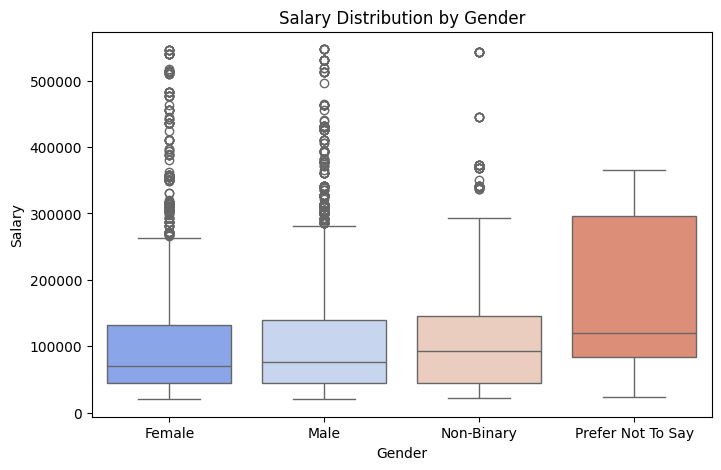

/tmp/ipykernel_14442/4234611304.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='Salary', palette='viridis', ci=None)
/tmp/ipykernel_14442/4234611304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Salary', palette='viridis', ci=None)


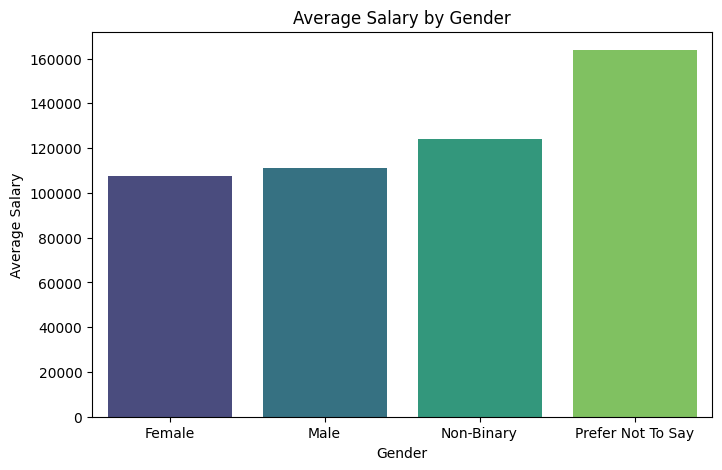

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Salary', palette='coolwarm')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Gender', y='Salary', palette='viridis', ci=None)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()


In [31]:
print(df.columns)

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceID', 'ReviewDate',
       'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
       'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating',
       'ManagerRating', 'DataQualityStatus'],
      dtype='object')


---
#### 4 . How does attrition vary across demographics (e.g., gender, ethnicity) and departments? 
#### 7 . How does marital status influence attrition rates? 


>

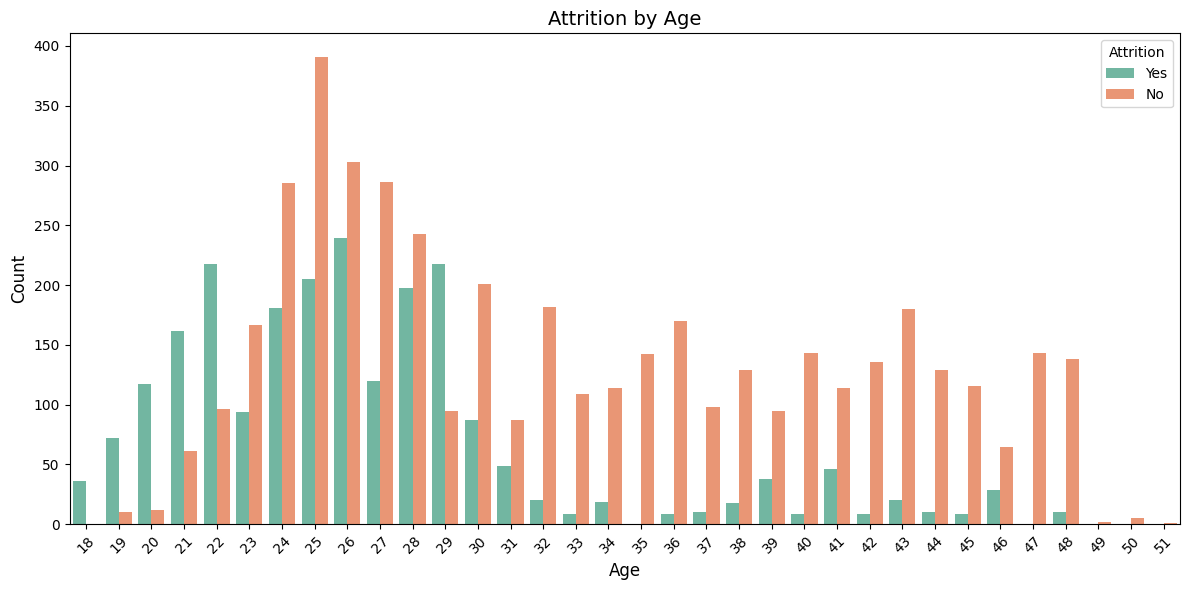

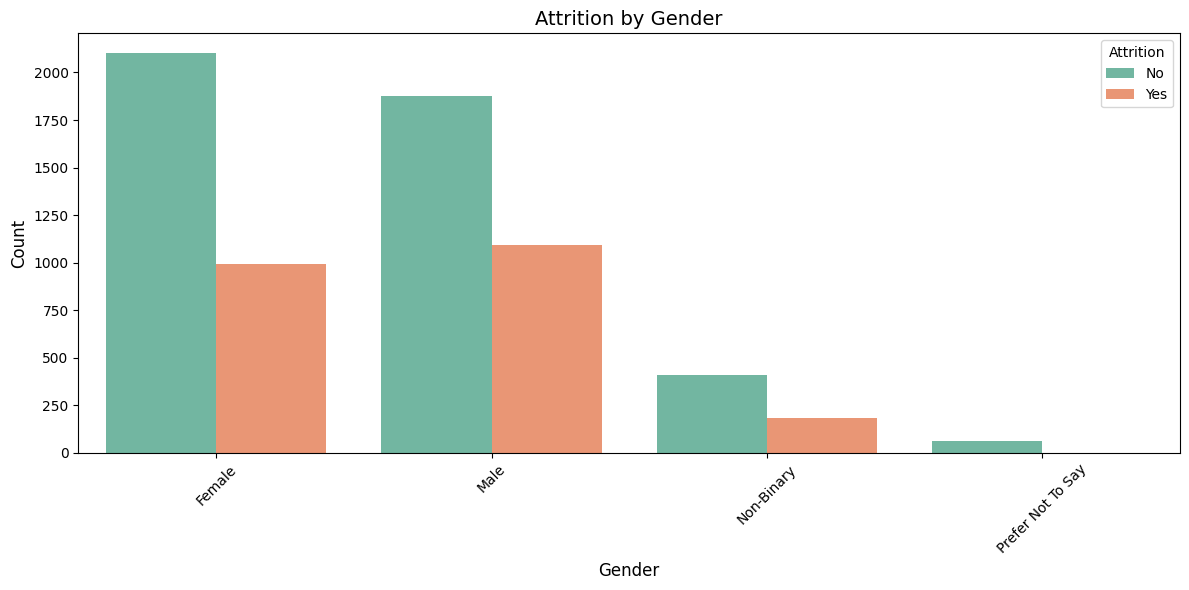

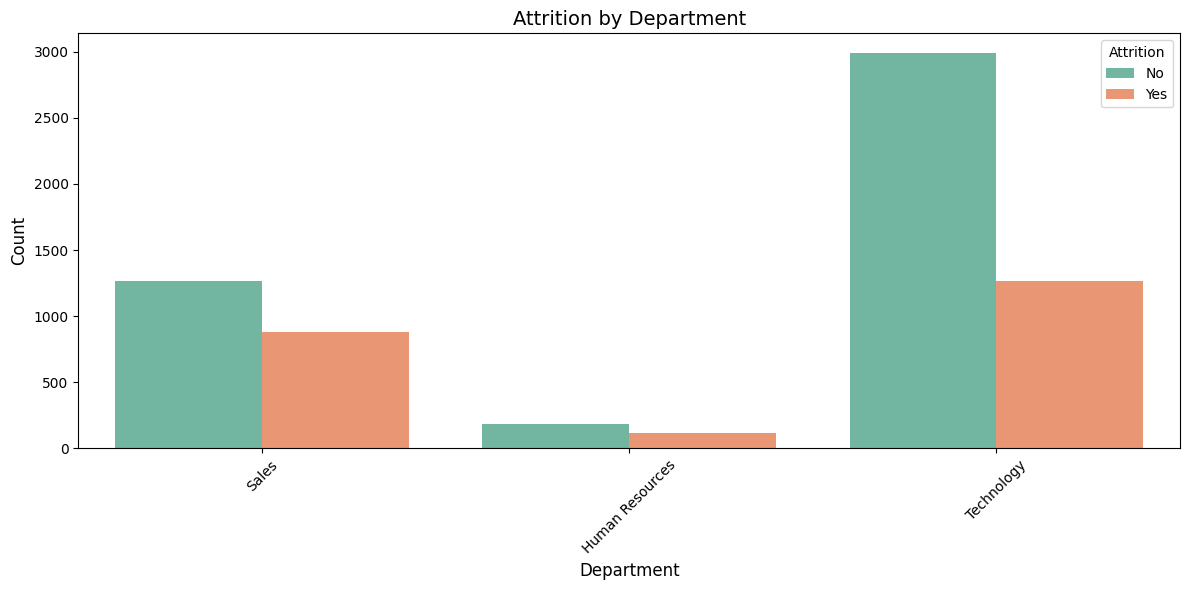

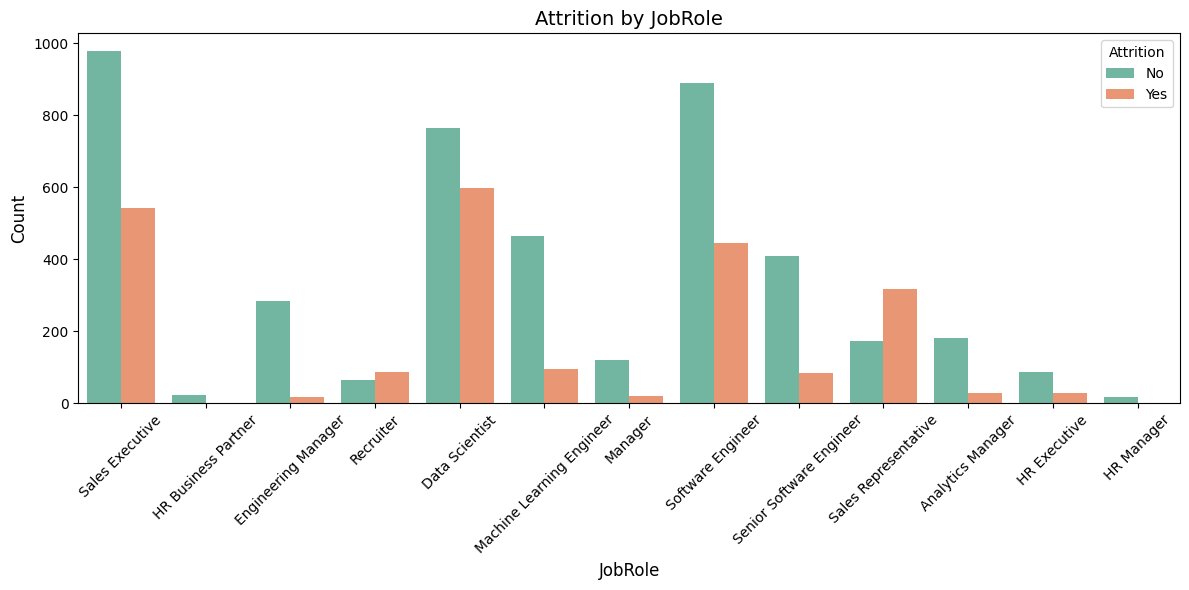

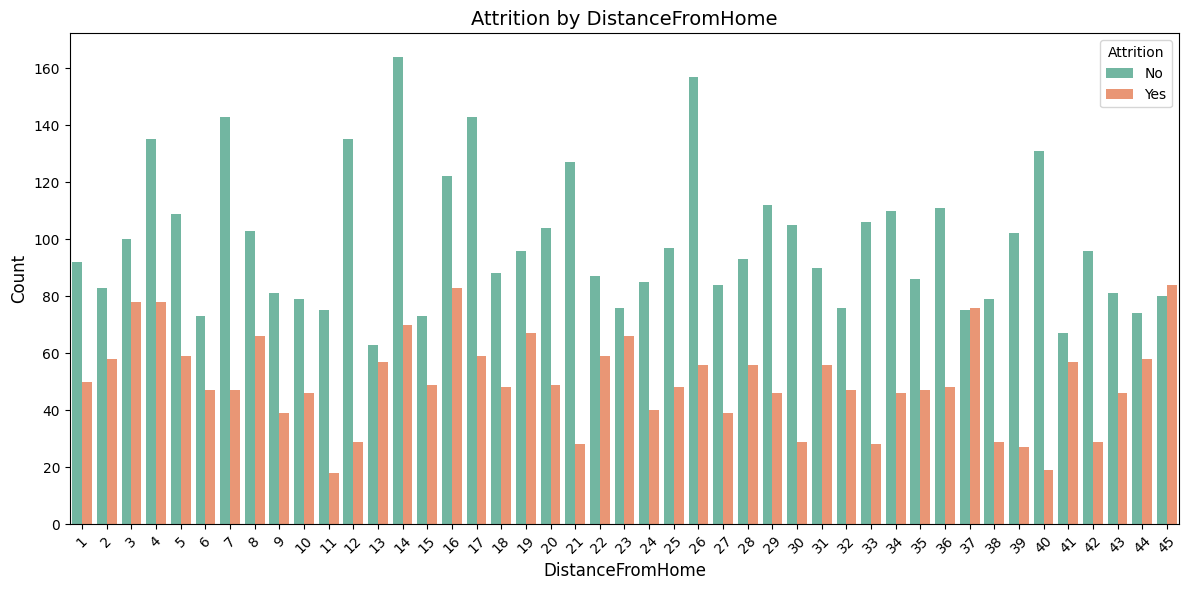

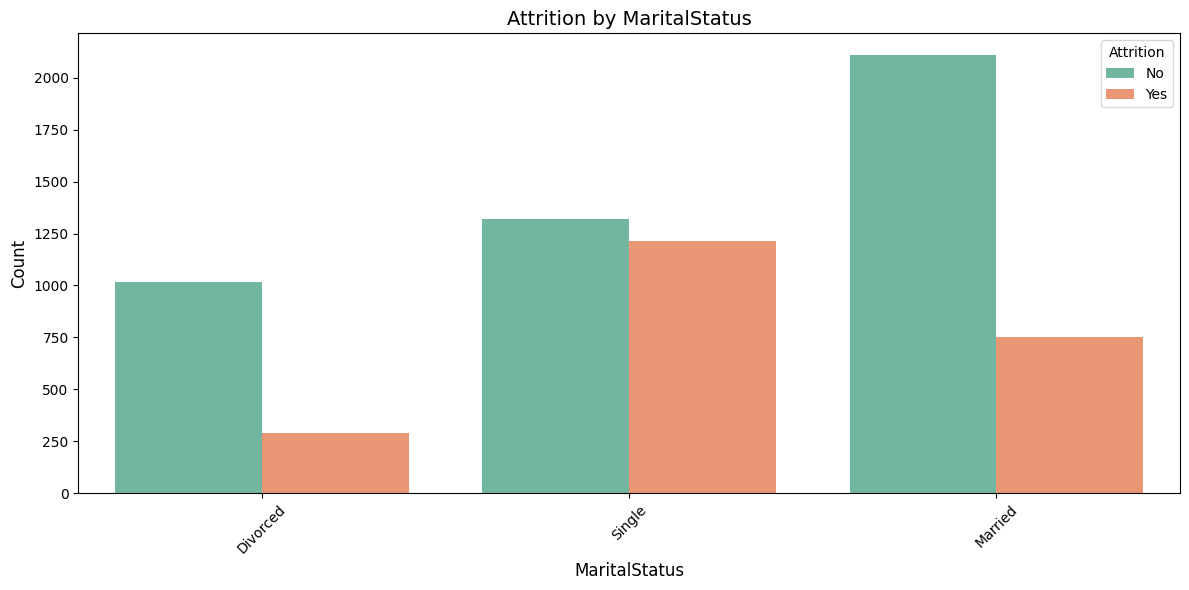

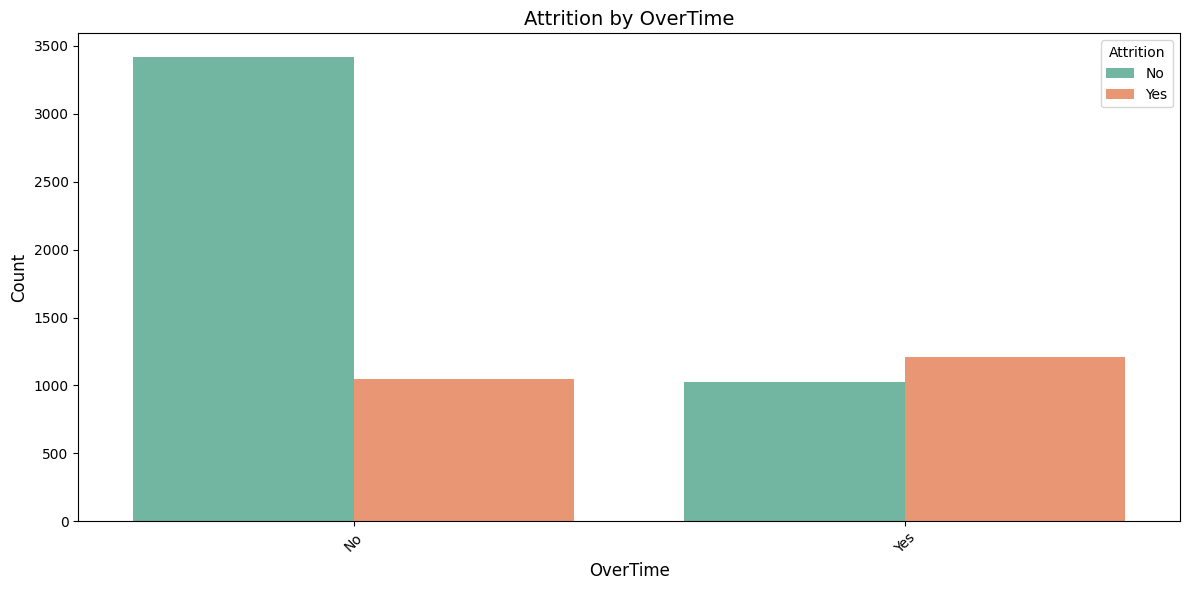

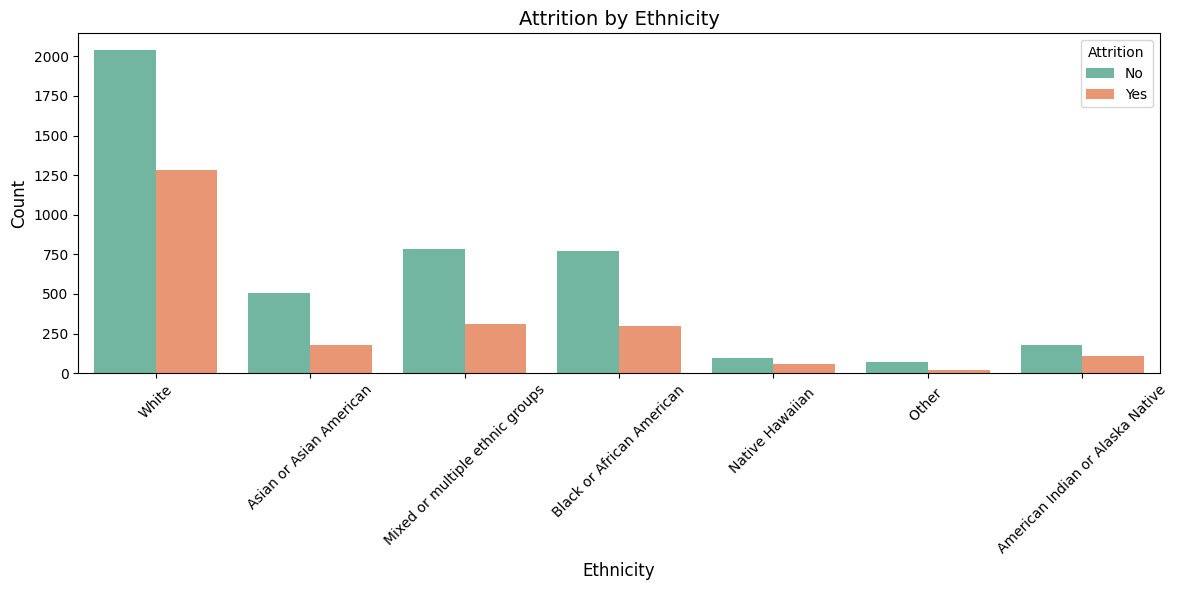

In [32]:
# List of key factors to analyze
key_factors = [
    'Age', 'Gender', 'Department', 'JobRole', 'DistanceFromHome', 
    'MaritalStatus', 'OverTime','Ethnicity'
]

# Loop through each factor and visualize attrition impact
for factor in key_factors:
    if factor in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=factor, hue='Attrition', palette='Set2')
        plt.title(f'Attrition by {factor}', fontsize=14)
        plt.xlabel(factor, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Attrition', loc='upper right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{factor}' not found in the dataset.")


---
#### 5 . Is there a correlation between DistanceFromHome and attrition? 
>

Correlation between DistanceFromHome and Attrition: -0.01


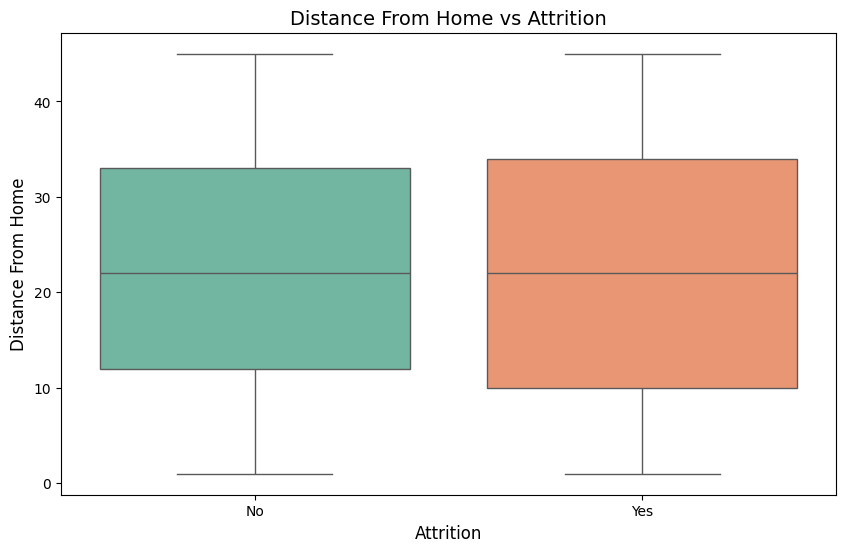

In [33]:
# Ensure the columns exist
if 'DistanceFromHome' in df.columns and 'Attrition' in df.columns:
    # Convert Attrition to numerical values (e.g., Yes=1, No=0)
    df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

    # Calculate correlation
    correlation = df['DistanceFromHome'].corr(df['AttritionNumeric'])
    print(f"Correlation between DistanceFromHome and Attrition: {correlation:.2f}")

    # Visualize the relationship
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, hue='Attrition', palette='Set2')
    plt.title('Distance From Home vs Attrition', fontsize=14)
    plt.xlabel('Attrition', fontsize=12)
    plt.ylabel('Distance From Home', fontsize=12)
    plt.show()
else:
    print("Required columns 'DistanceFromHome' or 'Attrition' are not found in the dataset.")


---
#### 6 .Is there a significant deference in salaries across departments, genders, or other demographic groups ?
>

Salary Comparison Across Demographics and Departments:

Average Salary by Department:
Department
Human Resources    105804.270627
Sales              121045.081899
Technology         106396.216115
Name: Salary, dtype: float64

ANOVA Test Result for Salary by Department: F-statistic = 16.40, P-value = 0.0000

T-test for Salary by Gender: T-statistic = 1.61, P-value = 0.1079


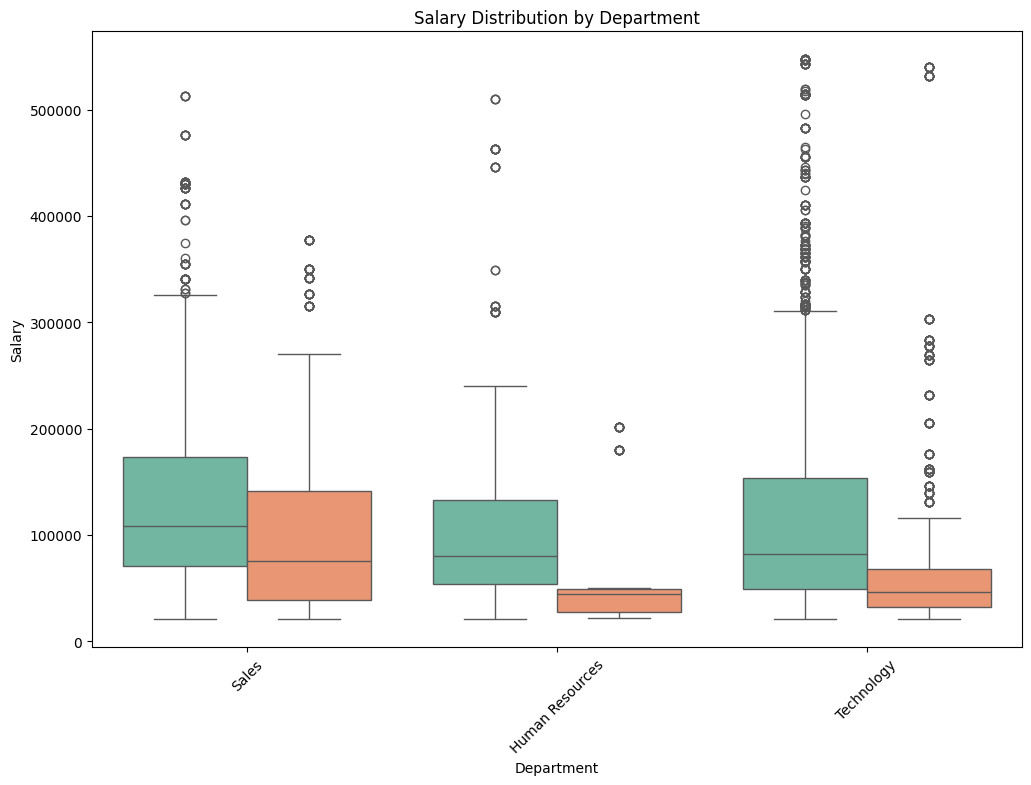

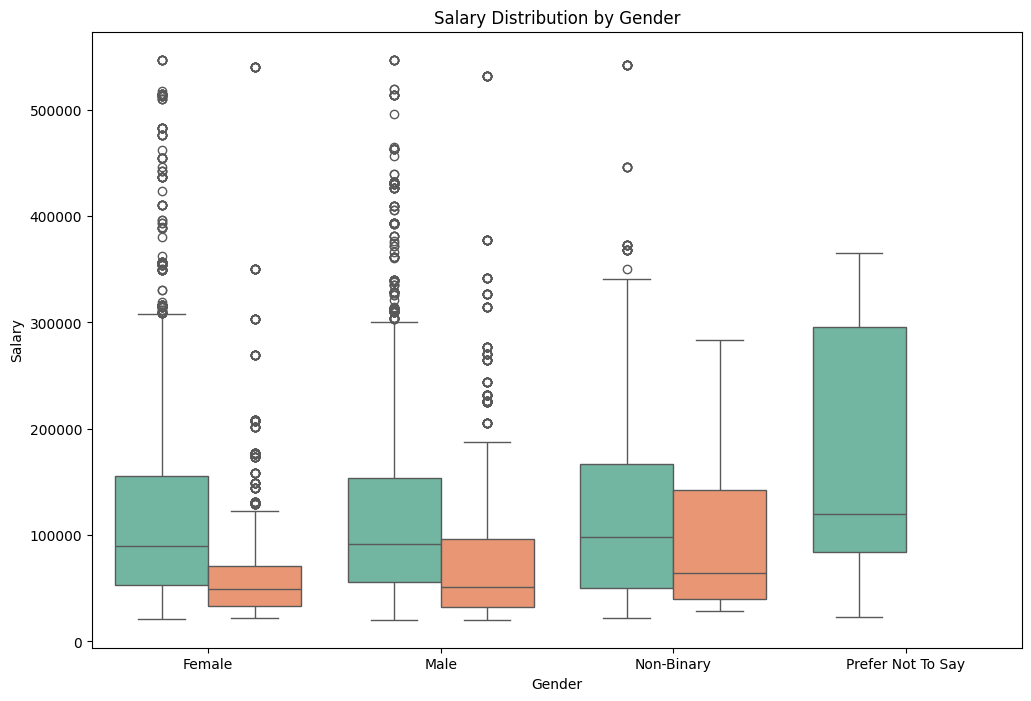


Stock Option Level and Retention (Attrition):
Correlation between StockOptionLevel and Attrition: -0.17


/tmp/ipykernel_14442/1572275051.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AttritionNumeric', y='StockOptionLevel', data=df, palette='Set2')


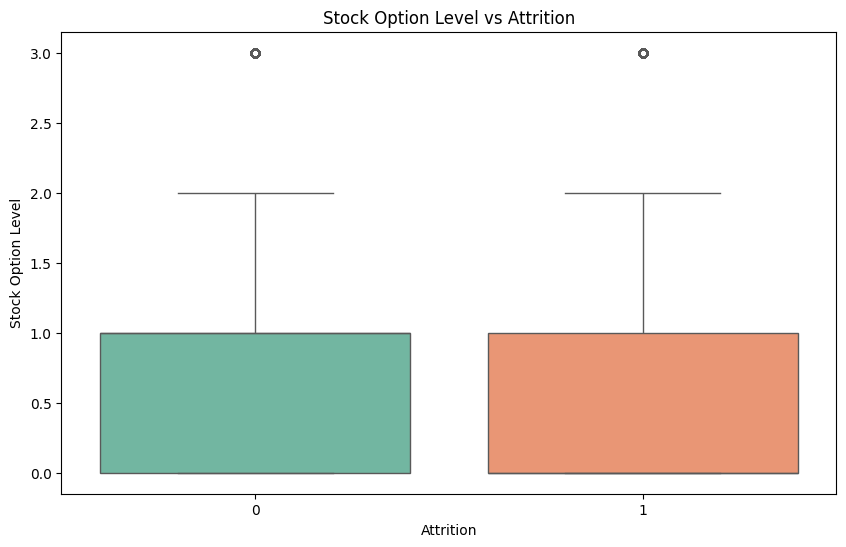

In [34]:
# Ensure necessary columns exist
required_columns = ['Attrition', 'Gender', 'Ethnicity', 'Department', 'Salary', 'StockOptionLevel', 'OverTime']
if all(col in df.columns for col in required_columns):
    
    # Convert Attrition to numerical values (Yes=1, No=0) if not already done
    if 'AttritionNumeric' not in df.columns:
        df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

    # 6. Is there a significant difference in salaries across departments, genders, or other demographic groups?
    
    print("Salary Comparison Across Demographics and Departments:")

    # Salary by Department (ANOVA)
    department_salary = df.groupby('Department')['Salary'].mean()
    print("\nAverage Salary by Department:")
    print(department_salary)
    
    # ANOVA Test for Salary by Department
    department_salary_groups = [group['Salary'].values for name, group in df.groupby('Department')]
    f_stat, p_val = stats.f_oneway(*department_salary_groups)
    print(f"\nANOVA Test Result for Salary by Department: F-statistic = {f_stat:.2f}, P-value = {p_val:.4f}")
    
    # Salary by Gender (T-test)
    male_salary = df[df['Gender'] == 'Male']['Salary']
    female_salary = df[df['Gender'] == 'Female']['Salary']
    t_stat, p_val_gender = stats.ttest_ind(male_salary, female_salary)
    print(f"\nT-test for Salary by Gender: T-statistic = {t_stat:.2f}, P-value = {p_val_gender:.4f}")
    
    # Visualize Salary by Department and Gender (with hue to avoid FutureWarning)
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Department', y='Salary', data=df, hue='Attrition', palette='Set2', legend=False)
    plt.title('Salary Distribution by Department')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Gender', y='Salary', data=df, hue='Attrition', palette='Set2', legend=False)
    plt.title('Salary Distribution by Gender')
    plt.show()

    # 7. How does stock option level influence employee retention and satisfaction?
    
    # Correlation between StockOptionLevel and Attrition (Retention)
    print("\nStock Option Level and Retention (Attrition):")
    correlation_stock = df['StockOptionLevel'].corr(df['AttritionNumeric'])
    print(f"Correlation between StockOptionLevel and Attrition: {correlation_stock:.2f}")
    
    # Visualize StockOptionLevel vs Attrition
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='AttritionNumeric', y='StockOptionLevel', data=df, palette='Set2')
    plt.title('Stock Option Level vs Attrition')
    plt.xlabel('Attrition')
    plt.ylabel('Stock Option Level')
    plt.show()

else:
    print("Some required columns are missing.")


---
#### 3) Compensation Analysis: 
#### Age Impact on Job Satisfaction and Attrition: 
#### How does job satisfaction vary across different age groups? 
#### What is the attrition rate for different age groups? 
>


Age Impact on Job Satisfaction and Attrition:


/tmp/ipykernel_14442/564504390.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='JobRole', data=df, palette='Set2')


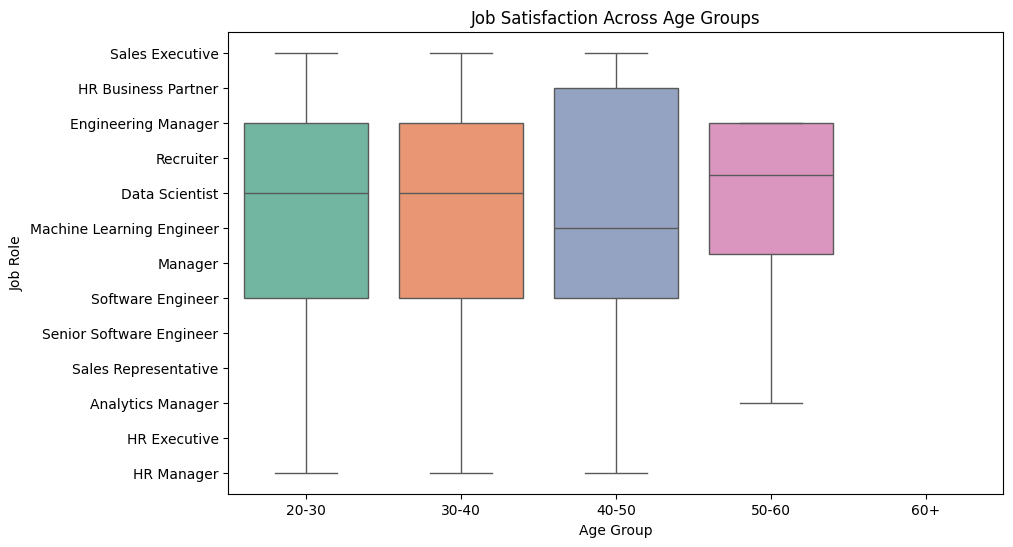

/tmp/ipykernel_14442/564504390.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate_by_age = df.groupby('AgeGroup')['AttritionNumeric'].mean()
/tmp/ipykernel_14442/564504390.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_age.index, y=attrition_rate_by_age.values, palette='Set2')



Attrition Rate by Age Group:
AgeGroup
20-30    0.474668
30-40    0.163304
40-50    0.108563
50-60    0.000000
60+           NaN
Name: AttritionNumeric, dtype: float64


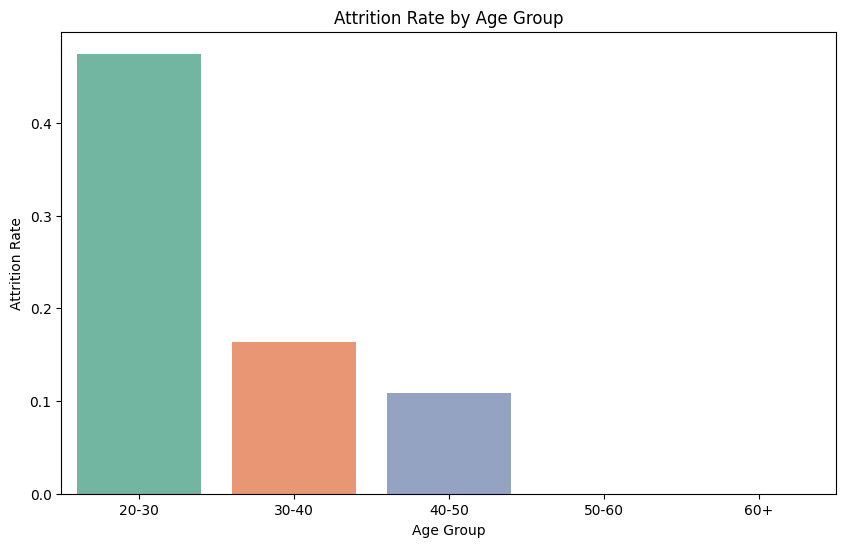

In [35]:
# Ensure necessary columns exist
required_columns = ['Attrition', 'Age', 'JobRole', 'Department', 'Gender']
if all(col in df.columns for col in required_columns):
    
    # Convert Attrition to numerical values (Yes=1, No=0) if not already done
    if 'AttritionNumeric' not in df.columns:
        df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    
    # 8. Age Impact on Job Satisfaction and Attrition:
    print("\nAge Impact on Job Satisfaction and Attrition:")

    # Create age groups (e.g., 20-30, 30-40, 40-50, 50+)
    age_bins = [20, 30, 40, 50, 60, 70]
    age_labels = ['20-30', '30-40', '40-50', '50-60', '60+']
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    
    # 1. How does job satisfaction vary across different age groups?
    # Assuming 'JobRole' or other columns are related to job satisfaction
    # If you have a specific column for job satisfaction, you can use it here
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='AgeGroup', y='JobRole', data=df, palette='Set2')
    plt.title('Job Satisfaction Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Job Role')
    plt.show()
    
    # 2. What is the attrition rate for different age groups?
    attrition_rate_by_age = df.groupby('AgeGroup')['AttritionNumeric'].mean()
    print("\nAttrition Rate by Age Group:")
    print(attrition_rate_by_age)
    
    # Visualize Attrition Rate by Age Group
    plt.figure(figsize=(10, 6))
    sns.barplot(x=attrition_rate_by_age.index, y=attrition_rate_by_age.values, palette='Set2')
    plt.title('Attrition Rate by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Attrition Rate')
    plt.show()

else:
    print("Some required columns are missing.")


---
#### 3) Compensation Analysis: 
#### Gender Differences in Job Satisfaction and Performance: 
#### How does job satisfaction vary between male and female employees? 
#### Is there a difference in performance ratings between male and female employees?
>


Gender Differences in Job Satisfaction and Performance:


/tmp/ipykernel_14442/2600150639.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='JobRole', data=df, palette='Set2')


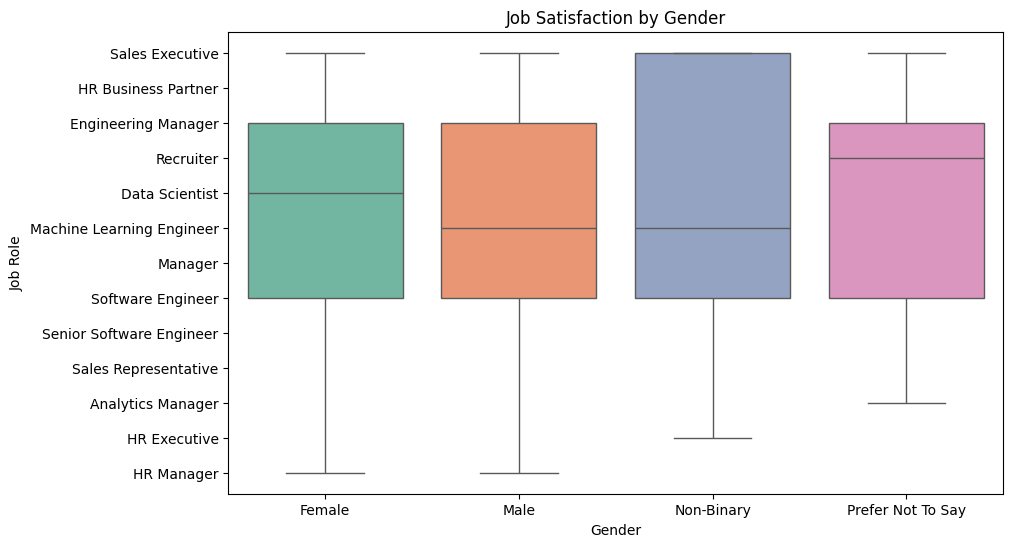

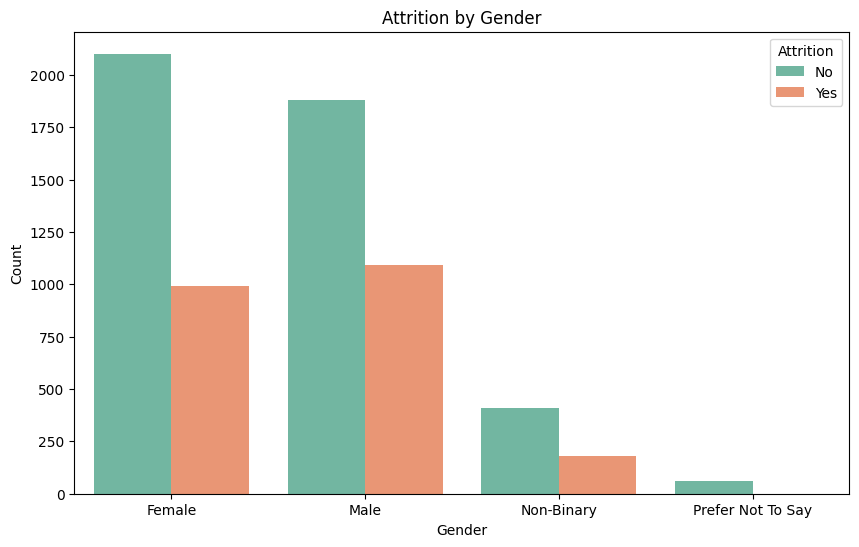


Chi-Square Test for Gender and Attrition: Chi2-statistic = 49.35, P-value = 0.0000


In [36]:
# Ensure necessary columns exist
required_columns = ['Attrition', 'Gender', 'JobRole', 'Age']
if all(col in df.columns for col in required_columns):
    
    # Convert Attrition to numerical values (Yes=1, No=0) if not already done
    if 'AttritionNumeric' not in df.columns:
        df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    
    # 9. Gender Differences in Job Satisfaction and Performance:
    print("\nGender Differences in Job Satisfaction and Performance:")
    
    # 1. How does job satisfaction vary between male and female employees?
    # Using JobRole as a proxy for job satisfaction
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Gender', y='JobRole', data=df, palette='Set2')
    plt.title('Job Satisfaction by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Job Role')
    plt.show()

    # 2. Is there a difference in retention (Attrition) by Gender?
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set2')
    plt.title('Attrition by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Statistical Test: Chi-Square Test for Gender and Attrition
    gender_attrition_crosstab = pd.crosstab(df['Gender'], df['Attrition'])
    chi2_stat, p_val_gender_attrition, dof, expected = stats.chi2_contingency(gender_attrition_crosstab)
    print(f"\nChi-Square Test for Gender and Attrition: Chi2-statistic = {chi2_stat:.2f}, P-value = {p_val_gender_attrition:.4f}")
    
else:
    print("Some required columns are missing.")


----
### 3) Compensation Analysis:
### Education Level and its Impact on Performance and Salary: 
### How does education level influence employee performance and salary variation? 
### How does education level impact employee performance? 
### How does salary vary by education level? 
### How does education level impact employee performance by manager rating? 
 
### Marital Status and Attrition: 
### How does marital status influence attrition rates and job satisfaction? 
### Does marital status affect attrition rates? 
### Is there a relationship between marital status and job satisfaction?
>


Salary Analysis Across Demographics and Departments:
Average Salary by Department:
Department
Human Resources    105804.270627
Sales              121045.081899
Technology         106396.216115
Name: Salary, dtype: float64
ANOVA Test for Salary by Department: F-statistic = 16.40, P-value = 0.0000
T-test for Salary by Gender: T-statistic = 1.61, P-value = 0.1079

Stock Option Level and Retention (Attrition):
Correlation between StockOptionLevel and Attrition: -0.17

Age Impact on Job Satisfaction and Attrition:
Average Job Satisfaction by Age Group:
AgeGroup
18-30    3.416400
31-40    3.477931
41-50    3.420327
51-60    3.000000
Name: JobSatisfaction, dtype: float64
Attrition Rate by Age Group:
AgeGroup
18-30    0.470574
31-40    0.124828
41-50    0.114556
51-60    0.000000
Name: AttritionNumeric, dtype: float64

Gender Differences in Job Satisfaction and Performance:
Average Job Satisfaction by Gender:
Gender
Female               3.437075
Male                 3.427898
Non-Binary       

/tmp/ipykernel_14442/914679188.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_job_satisfaction_age = df.groupby('AgeGroup')['JobSatisfaction'].mean()
/tmp/ipykernel_14442/914679188.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate_age = df.groupby('AgeGroup')['AttritionNumeric'].mean()
/tmp/ipykernel_14442/914679188.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Salary', data=df, palette='Set2')


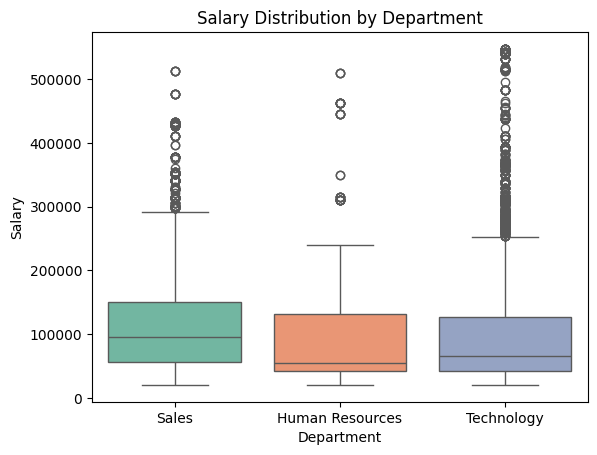

/tmp/ipykernel_14442/914679188.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='JobSatisfaction', data=df, palette='viridis')


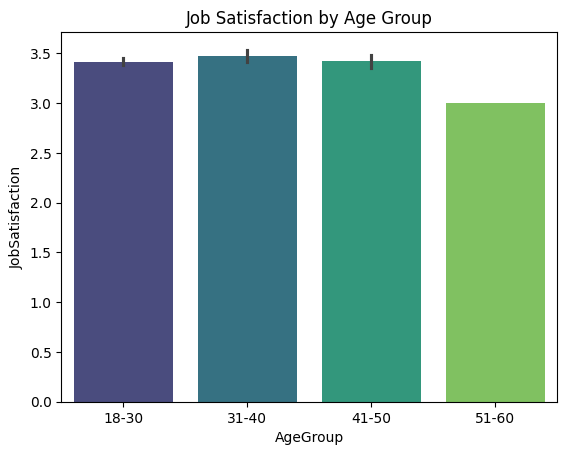

In [45]:
# Add 'AttritionNumeric' column based on 'Attrition' (Yes=1, No=0)
df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 6. Salary Analysis Across Demographics and Departments
print("\nSalary Analysis Across Demographics and Departments:")

# Average salary by department
avg_salary_department = df.groupby('Department')['Salary'].mean()
print("Average Salary by Department:")
print(avg_salary_department)

# ANOVA for salary by department
anova_salary_department = f_oneway(
    *[df.loc[df['Department'] == dept, 'Salary'] 
      for dept in df['Department'].unique()]
)
print(f"ANOVA Test for Salary by Department: F-statistic = {anova_salary_department.statistic:.2f}, P-value = {anova_salary_department.pvalue:.4f}")

# T-test for salary by gender
male_salary = df.loc[df['Gender'] == 'Male', 'Salary']
female_salary = df.loc[df['Gender'] == 'Female', 'Salary']
t_test_gender_salary = ttest_ind(male_salary, female_salary)
print(f"T-test for Salary by Gender: T-statistic = {t_test_gender_salary.statistic:.2f}, P-value = {t_test_gender_salary.pvalue:.4f}")

# 7. Stock Option Level and Retention (Attrition)
print("\nStock Option Level and Retention (Attrition):")
correlation_stock = df['StockOptionLevel'].corr(df['AttritionNumeric'])
print(f"Correlation between StockOptionLevel and Attrition: {correlation_stock:.2f}")

# 8. Age Impact on Job Satisfaction and Attrition
print("\nAge Impact on Job Satisfaction and Attrition:")

# Job satisfaction by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])
avg_job_satisfaction_age = df.groupby('AgeGroup')['JobSatisfaction'].mean()
print("Average Job Satisfaction by Age Group:")
print(avg_job_satisfaction_age)

# Attrition rate by age group
attrition_rate_age = df.groupby('AgeGroup')['AttritionNumeric'].mean()
print("Attrition Rate by Age Group:")
print(attrition_rate_age)

# 9. Gender Differences in Job Satisfaction and Performance
print("\nGender Differences in Job Satisfaction and Performance:")

# Job satisfaction by gender
avg_job_satisfaction_gender = df.groupby('Gender')['JobSatisfaction'].mean()
print("Average Job Satisfaction by Gender:")
print(avg_job_satisfaction_gender)

# Manager rating by gender
avg_manager_rating_gender = df.groupby('Gender')['ManagerRating'].mean()
print("Average Manager Rating by Gender:")
print(avg_manager_rating_gender)

# 10. Education Level and its Impact on Performance and Salary
print("\nEducation Level and its Impact on Performance and Salary:")

# Salary by education level
avg_salary_education = df.groupby('Education')['Salary'].mean()
print("Average Salary by Education Level:")
print(avg_salary_education)

# Manager rating by education level
avg_manager_rating_education = df.groupby('Education')['ManagerRating'].mean()
print("Average Manager Rating by Education Level:")
print(avg_manager_rating_education)

# 11. Marital Status and Attrition
print("\nMarital Status and Attrition:")

# Attrition rate by marital status
attrition_rate_marital = df.groupby('MaritalStatus')['AttritionNumeric'].mean()
print("Attrition Rate by Marital Status:")
print(attrition_rate_marital)

# Job satisfaction by marital status
avg_job_satisfaction_marital = df.groupby('MaritalStatus')['JobSatisfaction'].mean()
print("Job Satisfaction by Marital Status:")
print(avg_job_satisfaction_marital)

# Visualizations 
sns.boxplot(x='Department', y='Salary', data=df, palette='Set2')
plt.title("Salary Distribution by Department")
plt.show()

sns.barplot(x='AgeGroup', y='JobSatisfaction', data=df, palette='viridis')
plt.title("Job Satisfaction by Age Group")
plt.show()



---
#### 2. Geographic Insights: 
 
#### 4) Work Environment: 
#### 8 .Is there a correlation between overtime work and performance or attrition ? 
#### 9 .How does business travel affect employee satisfaction and retention ? 
>

Correlation between OverTime and Attrition: 0.31


/tmp/ipykernel_14442/843380454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='AttritionNumeric', data=df, palette='coolwarm')


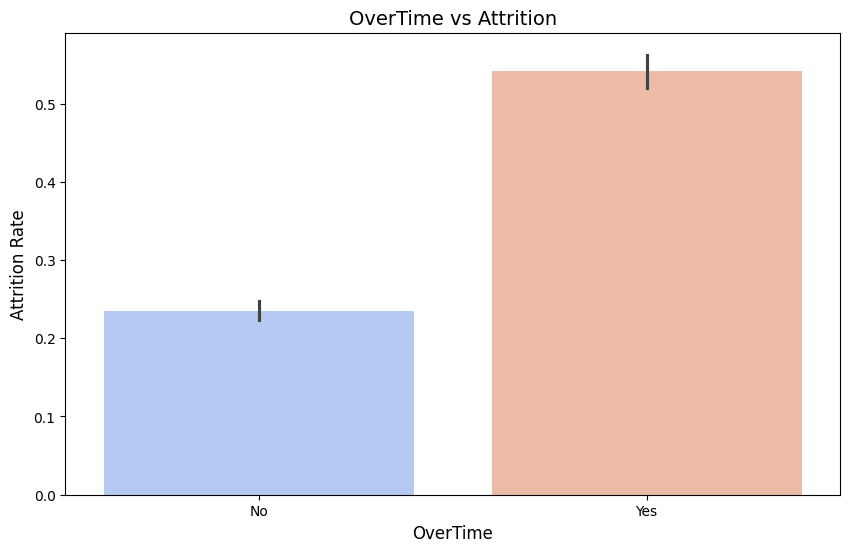

In [ ]:
# Check columns
if 'OverTime' in df.columns and 'Attrition' in df.columns:
    # Convert OverTime and Attrition to numeric
    df['OverTimeNumeric'] = df['OverTime'].map({'Yes': 1, 'No': 0})
    df['AttritionNumeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

    # Correlation between OverTime and Attrition
    correlation_attrition = df['OverTimeNumeric'].corr(df['AttritionNumeric'])
    print(f"Correlation between OverTime and Attrition: {correlation_attrition:.2f}")

    # Visualization for Attrition
    plt.figure(figsize=(10, 6))
    sns.barplot(x='OverTime', y='AttritionNumeric', data=df, palette='coolwarm')
    plt.title('OverTime vs Attrition', fontsize=14)
    plt.xlabel('OverTime', fontsize=12)
    plt.ylabel('Attrition Rate', fontsize=12)
    plt.show()

    # Analyze correlation with performance if available
    if 'Performance' in df.columns:
        correlation_performance = df['OverTimeNumeric'].corr(df['Performance'])
        print(f"Correlation between OverTime and Performance: {correlation_performance:.2f}")
else:
    print("Required columns 'OverTime' or 'Attrition' not found in the dataset.")
